In [1]:
#Подготовка данных
import pandas as pd
import numpy as np
tr_d = pd.read_csv('train.csv', sep=',')
test_d = pd.read_csv('test.csv', sep=',')

print(tr_d.isna().sum(axis = 0))
print(test_d.isna().sum(axis = 0))
print(test_d)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
     PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. 

In [2]:
#Выбираем признаки для нейросети
train_data = pd.DataFrame(tr_d,columns  = ['Pclass','Fare','Age','Sex'])
test_data = pd.DataFrame(test_d,columns  = ['Pclass','Fare','Age','Sex'])

train_data = train_data.dropna()
test_data = test_data.dropna()

train_data['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
test_data['Sex'].replace(['male', 'female'], [1, 0], inplace=True)

print(train_data,test_data)



     Pclass      Fare   Age  Sex
0         3    7.2500  22.0    1
1         1   71.2833  38.0    0
2         3    7.9250  26.0    0
3         1   53.1000  35.0    0
4         3    8.0500  35.0    1
6         1   51.8625  54.0    1
7         3   21.0750   2.0    1
8         3   11.1333  27.0    0
9         2   30.0708  14.0    0
10        3   16.7000   4.0    0
11        1   26.5500  58.0    0
12        3    8.0500  20.0    1
13        3   31.2750  39.0    1
14        3    7.8542  14.0    0
15        2   16.0000  55.0    0
16        3   29.1250   2.0    1
18        3   18.0000  31.0    0
20        2   26.0000  35.0    1
21        2   13.0000  34.0    1
22        3    8.0292  15.0    0
23        1   35.5000  28.0    1
24        3   21.0750   8.0    0
25        3   31.3875  38.0    0
27        1  263.0000  19.0    1
30        1   27.7208  40.0    1
33        2   10.5000  66.0    1
34        1   82.1708  28.0    1
35        1   52.0000  42.0    1
37        3    8.0500  21.0    1
38        

In [3]:
#Выделите целевую переменную - она записана в столбце Survived
y_train= pd.DataFrame(tr_d,columns = ['Survived','Age'])
y_train = y_train.dropna()
del y_train['Age']
print("y_train",y_train)

#Преобразуем в массив numpy для деревьев
train_data = np.array(train_data)
test_data = np.array(test_data)
y_train = np.array(y_train)
print(train_data)
print(y_train)

y_train      Survived
0           0
1           1
2           1
3           1
4           0
6           0
7           0
8           1
9           1
10          1
11          1
12          0
13          0
14          0
15          1
16          0
18          0
20          0
21          1
22          1
23          1
24          0
25          1
27          0
30          0
33          0
34          0
35          0
37          0
38          0
..        ...
856         1
857         1
858         1
860         0
861         0
862         1
864         0
865         1
866         1
867         0
869         1
870         0
871         1
872         0
873         0
874         1
875         1
876         0
877         0
879         1
880         1
881         0
882         0
883         0
884         0
885         0
886         0
887         1
889         1
890         0

[714 rows x 1 columns]
[[ 3.      7.25   22.      1.    ]
 [ 1.     71.2833 38.      0.    ]
 [ 3.      7.925  26.      0. 

Train on 642 samples, validate on 72 samples
Epoch 1/100
642/642 [==============================] - 1s 1ms/sample - loss: 1.8245 - accuracy: 0.5062 - val_loss: 0.5105 - val_accuracy: 0.7500
Epoch 2/100
642/642 [==============================] - 0s 298us/sample - loss: 0.6753 - accuracy: 0.6386 - val_loss: 0.5085 - val_accuracy: 0.7500
Epoch 3/100
642/642 [==============================] - 0s 294us/sample - loss: 0.6295 - accuracy: 0.6558 - val_loss: 0.5231 - val_accuracy: 0.7500
Epoch 4/100
642/642 [==============================] - 0s 308us/sample - loss: 0.6247 - accuracy: 0.6636 - val_loss: 0.5259 - val_accuracy: 0.6944
Epoch 5/100
642/642 [==============================] - 0s 283us/sample - loss: 0.6165 - accuracy: 0.6589 - val_loss: 0.5240 - val_accuracy: 0.6806
Epoch 6/100
642/642 [==============================] - 0s 388us/sample - loss: 0.6096 - accuracy: 0.6776 - val_loss: 0.5560 - val_accuracy: 0.7500
Epoch 7/100
642/642 [==============================] - 0s 262us/sample - lo

642/642 [==============================] - 0s 219us/sample - loss: 0.5012 - accuracy: 0.7632 - val_loss: 0.4118 - val_accuracy: 0.8333
Epoch 57/100
642/642 [==============================] - 0s 243us/sample - loss: 0.4783 - accuracy: 0.7850 - val_loss: 0.4075 - val_accuracy: 0.8333
Epoch 58/100
642/642 [==============================] - 0s 247us/sample - loss: 0.4822 - accuracy: 0.7819 - val_loss: 0.3875 - val_accuracy: 0.8472
Epoch 59/100
642/642 [==============================] - 0s 243us/sample - loss: 0.4824 - accuracy: 0.7726 - val_loss: 0.3956 - val_accuracy: 0.8333
Epoch 60/100
642/642 [==============================] - 0s 219us/sample - loss: 0.4698 - accuracy: 0.7991 - val_loss: 0.4092 - val_accuracy: 0.8333
Epoch 61/100
642/642 [==============================] - 0s 259us/sample - loss: 0.4886 - accuracy: 0.7757 - val_loss: 0.3973 - val_accuracy: 0.8333
Epoch 62/100
642/642 [==============================] - 0s 226us/sample - loss: 0.4785 - accuracy: 0.7866 - val_loss: 0.3927 

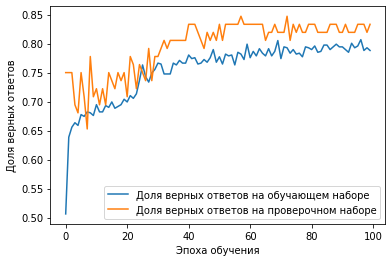

714/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


accuracy: 79.83%


In [5]:
from tensorflow.keras.models import Sequential #импортируем модель
from tensorflow.keras.layers import Dense #импортируем слои
import numpy
import matplotlib.pyplot as plt

#инициализируем модуль
model = Sequential()
model.add(Dense(12,input_dim=4, activation = 'relu'))
model.add(Dense(20,activation = 'relu'))#20
model.add(Dense(10,activation = 'relu'))#8
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

#обучаем
history = model.fit(train_data,y_train,
                    epochs = 100,
                    batch_size=8,
                    validation_split=0.1,#оучающая выборка, ответы по ней, сколька раз проделываем обучения, размер пакет (на каждой эпохе берем 10 строк)
                    verbose=1)
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# оценка результата
scores = model.evaluate(train_data,y_train)#выведет 2 числа: первое - значение функции потерь, второе - точность

# Метод evaluate() возвращает значения функции потерь и метрики для обученной модели:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [136]:
model.save("my_dense_model.h5")

In [26]:
predictions = model.predict(train_data)
print(predictions[1], y_train[1,])
print(predictions[39], y_train[39,])
print(predictions[255], y_train[255,])

print(predictions[28], y_train[28,])

[0.8933512] [1]
[0.7411959] [1]
[0.9798959] [1]
[0.13858739] [0]
